#### Problem 1

In [ ]:
from math import sqrt

a, b = -1, 2
R = (-1 + sqrt(5)) / 2
h = b - a

x1 = b - R * h
x2 = a + R * h

print("x1 : [{:.4f}]".format(x1))
print("x2 : [{:.4f}]".format(x2))

x1 : [0.1459]
x2 : [0.8541]


#### Problem 2 $$ V = 4\epsilon[(\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^{6}] $$

In [1]:
import numpy as np

def search_interval(func, x_init, h_init=0.01, max_iter=100) : 
    
    def f_dif(x, step_size) : 
        return (func(x) - func(x + step_size)) / step_size
    
    if f_dif(x_init, h_init) > 0 : 
        h_init = -1 * abs(h_init)
    elif f_dif(x_init, h_init) < 0 : 
        h_init = abs(h_init)
    else : 
        print("function is already in \
              local minimum at x_init : [{}]".format(x_init))
        return [x_init, x_init]

    interval = None
    count = 0
    x_list = []
    while count <= max_iter : 
        x_list.append(x_init)
        slope1 = f_dif(x_init, h_init)
        slope2 = f_dif(x_init + h_init, h_init)

        if slope1 * slope2 < 0 : 
            interval = [
                min(x_init, x_init + h_init), 
                max(x_init, x_init + h_init)
            ]
            x_list.append(x_init + h_init)
            break

        else : 
            x_init -= h_init
            h_init *= (slope1 / slope2) * 2
            count += 1
    
    if not interval : 
        print("Failed to converge.")
        return None, np.array(x_list)

    return interval, np.array(x_list)

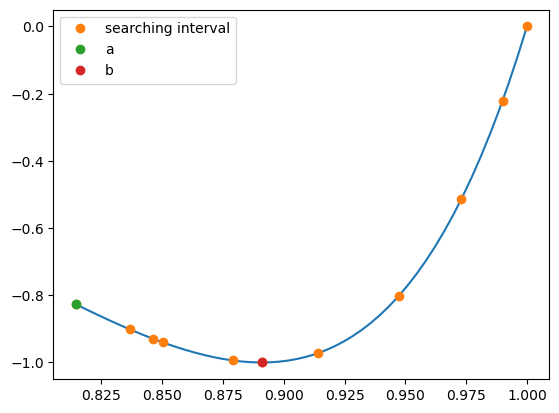

Local minimum is in [0.8145295852076122 , 0.8910603631536881]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(var) : 
    return 4 * (var**12 - var**6)

interval, x_arr = search_interval(f, 1)
x_range = np.linspace(x_arr.min(), x_arr.max())
x0 = interval[0]
x1 = interval[1]

plt.plot(x_range, f(x_range))
plt.plot(x_arr, f(x_arr), 'o', label="searching interval")
plt.plot(x0, f(x0), 'o', label="a")
plt.plot(x1, f(x1), 'o', label="b")
plt.legend()
plt.show()

print("Local minimum is in [{} , {}]".format(x0, x1))

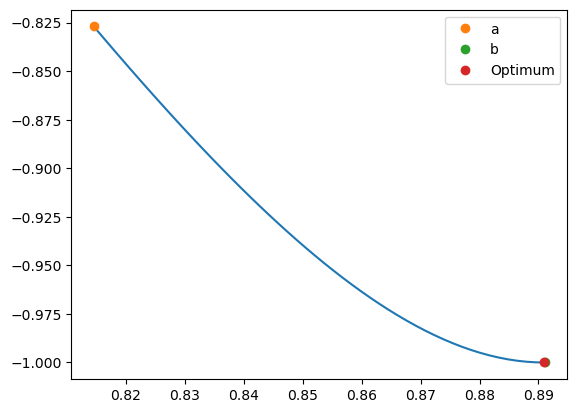

The optimum that minimizes the potential is : [0.8908987181792783]


In [ ]:
from math import sqrt

def golden_section_search(a, b, func, max_iter=100, tol=1.0e-9) : 
    assert b - a > 0, ValueError("b must be larger than a.")

    R = (-1 + sqrt(5)) / 2

    root_min = None
    count = 0
    while count <= max_iter : 
        h = b - a
        x_a = b - R * h
        x_b = a + R * h

        if h <= tol : 
            f_a = func(a)
            f_b = func(b)
            root_min = a if f_a < f_b else b
            break

        f_a = func(x_a)
        f_b = func(x_b)

        if f_a > f_b : 
            a = x_a
        else : 
            b = x_b

        
        count += 1
    
    if not root_min : 
        print("Failed to converge.")
        return None
    
    return root_min


x_opt = golden_section_search(x0, x1, func=f)

x_range = np.linspace(x0, x1)

plt.plot(x_range, f(x_range))
plt.plot(x0, f(x0), 'o', label="a")
plt.plot(x1, f(x1), 'o', label="b")
plt.plot(x_opt, f(x_opt), 'o', label="Optimum")
plt.legend()
plt.show()

print("The optimum that minimizes the potential is : [{}]".format(x_opt))

#### Problem 3 $$ y = x^{2}, \ \ P(1,2) $$

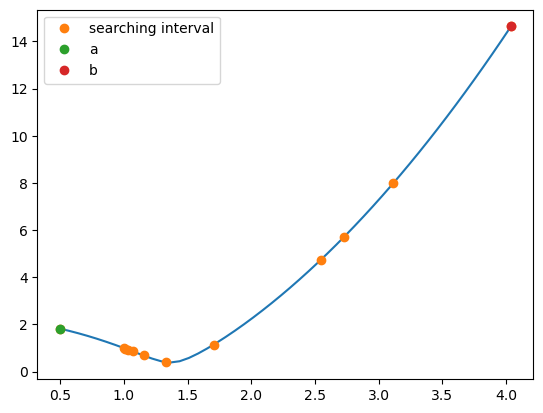

Local minimum is in [0.4979608889717726 , 4.03904066617336]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt

def distance(x) : 
    return sqrt((x - 1)**2 + (x**2 - 2)**2)

interval, x_arr = search_interval(distance, 1)
x_range = np.linspace(x_arr.min(), x_arr.max())
x0 = interval[0]
x1 = interval[1]

plt.plot(x_range, distance(x_range))
plt.plot(x_arr, distance(x_arr), 'o', label="searching interval")
plt.plot(x0, distance(x0), 'o', label="a")
plt.plot(x1, distance(x1), 'o', label="b")
plt.legend()
plt.show()

print("Local minimum is in [{} , {}]".format(x0, x1))


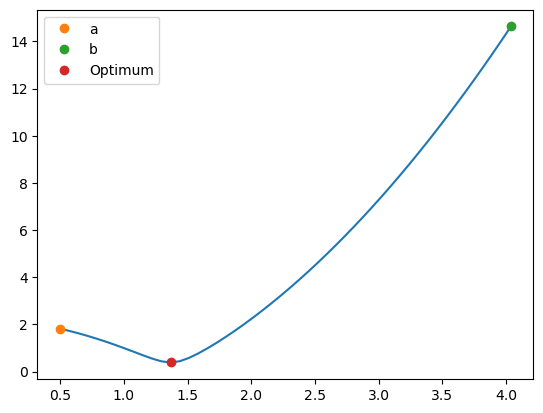

The optimum that minimizes the distance is : [1.366025402393879]


In [ ]:
x_opt = golden_section_search(x0, x1, func=distance)

x_range = np.linspace(x0, x1)

plt.plot(x_range, distance(x_range))
plt.plot(x0, distance(x0), 'o', label="a")
plt.plot(x1, distance(x1), 'o', label="b")
plt.plot(x_opt, distance(x_opt), 'o', label="Optimum")
plt.legend()
plt.show()

print("The optimum that minimizes the distance is : [{}]".format(x_opt))

#### Problem 4

#### $$ V = \pi r^{2}(\frac{b}{3} + h) = 1.0 m^{3} $$

#### $$ S = \pi r(2h + \sqrt{b^{2} + r^{2}}) $$

In [ ]:
import sys, os
import numpy as np

sys.path.append("../myModules")

from powell import powell
from numpy import asarray, pi, sqrt

def objective_fn(x):
    r, h, b = x
    return pi * r * (2 * h + sqrt(b**2 + r**2))

def constraint_fns(x):
    r, h, b = x
    return (-r, -h, -b, abs( pi * r**2 * ( b/3. + h ) - 1),)

def lagrangian_function(lam):
    return lambda _ : F(_,lam)

def F(x,lam):
    objective = objective_fn(x)
    penalties = map(lambda _: max(_,0)**2, constraint_fns(x))
    penalty = sum(penalties)
    return objective + lam * penalty

lam = 1000.0
xStart = asarray([1/sqrt(pi), 1./2, 3./2])
x, numIter = powell(lagrangian_function(lam), xStart, 0.01)

r, h, b = x
print("r : [{:.3f}]".format(r))
print("h : [{:.3f}]".format(h))
print("b : [{:.3f}]".format(b))

r : [0.753]
h : [0.337]
b : [0.673]
